In [47]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [48]:
nutrients = pd.read_csv("nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,38.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4.0,0.0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,999,999,89,42,23.0,1.4,119.0,Dairy products


In [49]:
# nutrients=nutrients.replace('t',np.nan,regex=True).fillna(0)
# nutrients=nutrients.replace('a',np.nan,regex=True).fillna(0)
# nutrients=nutrients.replace(',',np.nan,regex=True).fillna(0)
nutrients=nutrients.replace('',np.nan,regex=True).fillna(0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,38.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4.0,0.0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,999,999,89,42,23.0,1.4,119.0,Dairy products


In [50]:
nutrients['Grams'] = pd.to_numeric(nutrients['Grams'], errors='coerce')
nutrients['Calories'] = pd.to_numeric(nutrients['Calories'], errors='coerce')
nutrients['Protein'] = pd.to_numeric(nutrients['Protein'], errors='coerce')
nutrients['Fat'] = pd.to_numeric(nutrients['Fat'], errors='coerce')
nutrients['Sat.Fat'] = pd.to_numeric(nutrients['Sat.Fat'], errors='coerce')
nutrients['Fiber'] = pd.to_numeric(nutrients['Fiber'], errors='coerce')
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'], errors='coerce')

In [51]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories      int64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [52]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Fat         False
Sat.Fat     False
Fiber       False
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            Grams    Calories     Protein         Fat     Sat.Fat       Fiber  \
count  334.000000  334.000000  334.000000  334.000000  334.000000  334.000000   
mean   142.083832  186.625749    8.595808    8.565868    6.425150    2.370090   
std    128.807509  173.292963   17.755127   19.822035   18.503115   16.078785   
min     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     60.000000   75.000000    1.000000    0.000000    0.000000    0.000000   
50%    108.000000  131.000000    3.000000    1.000000    0.000000    0.20000

In [53]:
nutrients=nutrients.dropna()
nutrients.shape

(334, 10)

C:\Users\gaurav shresth\AppData\Local\Temp\ipykernel_22392\3499221580.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




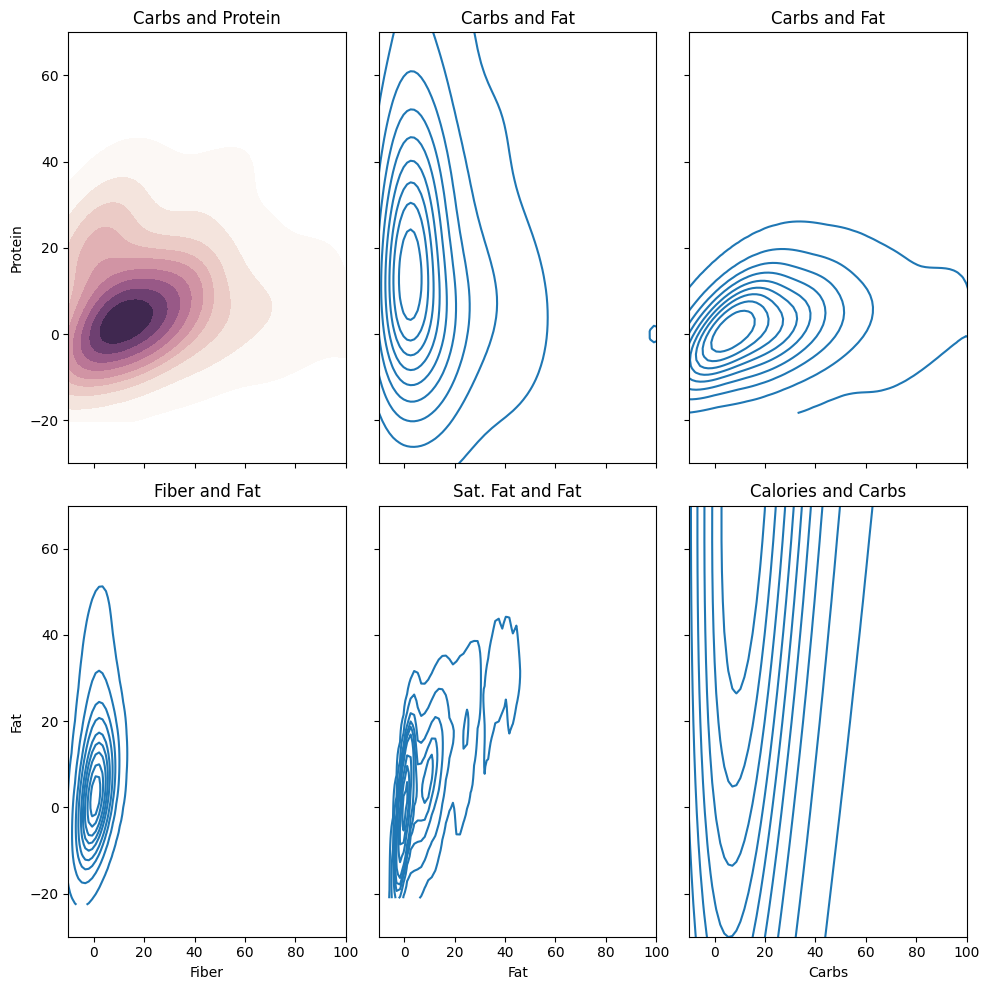

In [54]:
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'],
            cmap=cmap, shade=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'], y=nutrients['Carbs'], ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

f.tight_layout()


In [55]:
# alls=['Vegetables A-E',
#  'Vegetables F-P',
#  'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

# prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich = nutrients.sort_values(by='Protein', ascending=False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 20 protein rich foods')
fig.show()

In [56]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20_cals, x='Food', y='Calories',
             color='Calories', title=' Top 20 calorie rich foods')
fig.show()

In [57]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

In [58]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
"Breads, cereals, fastfood,grains","BiscuitsBran flakesBread, cracked wheatRyeWhit...",11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11594,403,207,99.0,115.91,2059.0
Dairy products,"Cows' milkMilk skimButtermilkEvaporated, undil...",1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,6992,8060,503,396,324.0,4.40,651.0
"Desserts, sweets",Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608,78,163,150.0,20.50,1184.0
"Drinks,Alcohol, Beverages",BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112,0,0,0.0,0.00,167.0
"Fats, Oils, Shortenings",YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629,234,631,536.0,234.00,239.0
"Fish, Seafood",ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1892,2912,606,347,252.0,235.00,263.0
Fruits A-F,"Watercress stems, rawApple juice cannedApple v...",1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328,29,20,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit, fresh, 5"" diame...",1 cup01-Feb1 cup1 cup1 cup1 cup1/2 cup6-oz. ca...,5412,4054,28,25,21.0,21.10,1009.0
Fruits R-Z,"RaisinsRaspberriesRaw, redRhubarb sweetenedStr...",1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228,7,1,0.0,17.40,330.0


In [59]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()